In [10]:
titration_volumes = []
for i in range(0,50+1):
    titration_volumes.append(round(i*0.001,4))
print(titration_volumes)

[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05]


The titration values

In [11]:
Ka = 1e-5
Kb = 1e-14/Ka
C1 = 1
C2 = 1
V = 0.025

C1 Acid Conc in moldm-3<br>
C2 Base Conc in moldm-3<br>
V initial acid volume in dm3<br>

In [12]:
def get_acid_salt(v):
    mol1 = V*C1
    mol2 = v*C2
    total_v = v+V
    if mol1 > mol2:
        return [(mol1-mol2)/total_v,mol2/total_v]
    return [-(mol2-mol1)/total_v,mol1/total_v]

When given base volume calculates the remaining acid and salt conc

In [13]:
acid_salt_conc = []
for i in titration_volumes:
    acid_salt_conc.append(get_acid_salt(i))
    print(i," -> ", round(get_acid_salt(i)[0],4), " | ",round(get_acid_salt(i)[1],4))

0.0  ->  1.0  |  0.0
0.001  ->  0.9231  |  0.0385
0.002  ->  0.8519  |  0.0741
0.003  ->  0.7857  |  0.1071
0.004  ->  0.7241  |  0.1379
0.005  ->  0.6667  |  0.1667
0.006  ->  0.6129  |  0.1935
0.007  ->  0.5625  |  0.2188
0.008  ->  0.5152  |  0.2424
0.009  ->  0.4706  |  0.2647
0.01  ->  0.4286  |  0.2857
0.011  ->  0.3889  |  0.3056
0.012  ->  0.3514  |  0.3243
0.013  ->  0.3158  |  0.3421
0.014  ->  0.2821  |  0.359
0.015  ->  0.25  |  0.375
0.016  ->  0.2195  |  0.3902
0.017  ->  0.1905  |  0.4048
0.018  ->  0.1628  |  0.4186
0.019  ->  0.1364  |  0.4318
0.02  ->  0.1111  |  0.4444
0.021  ->  0.087  |  0.4565
0.022  ->  0.0638  |  0.4681
0.023  ->  0.0417  |  0.4792
0.024  ->  0.0204  |  0.4898
0.025  ->  -0.0  |  0.5
0.026  ->  -0.0196  |  0.4902
0.027  ->  -0.0385  |  0.4808
0.028  ->  -0.0566  |  0.4717
0.029  ->  -0.0741  |  0.463
0.03  ->  -0.0909  |  0.4545
0.031  ->  -0.1071  |  0.4464
0.032  ->  -0.1228  |  0.4386
0.033  ->  -0.1379  |  0.431
0.034  ->  -0.1525  |  0.4237

In [14]:
def solve_x(a,b,c):
    return (pow((pow(b,2)-4*a*c),0.5)-b)/2*a

Solves a polynomial equation

In [15]:
import math
def calc_pH(conc):
    return -1*math.log(conc,10)
    
def calc_pOH(conc):
    return -1*math.log(conc,10)

Calculates by the concentration

In [16]:
pH_values = []
for concs in acid_salt_conc:
    if(concs[0] > 0):
        h_conc = solve_x(1,(concs[1]+Ka),-Ka*concs[0])
        pH_values.append(calc_pH(h_conc))
    else:
        oh_conc = solve_x(1,(-1*concs[0])+Kb,-Kb*concs[1])+(-1*concs[0])
        pH_values.append(14-calc_pOH(oh_conc))


In [17]:
for i in pH_values:
    print(i)

2.500686679582912
3.622585255420319
3.9400332817156594
4.135035996523903
4.28003736690269
4.398070246234263
4.499491118032069
4.589896426013732
4.6726970403731825
4.75016809544481
4.82394673805488
4.895296949828425
4.965265789301977
5.034786517917585
5.104756953443864
5.17611056025971
5.249894861363248
5.327374712782453
5.410188874178466
5.500615583617402
5.60207220562035
5.720170628350962
5.865311969251205
6.060707691894483
6.380220477913653
9.349475291048172
12.29243037762644
12.585026793174816
12.752845449056657
12.869666268148585
12.958607338727969
13.029963240266671
13.089223196971757
13.13966200326849
13.18339050570563
13.221848756130774
13.256062855621003
13.286789561224069
13.314602806900673
13.339948065239613
13.363177905549398
13.38457604991322
13.404374121194552
13.422763594675775
13.439904512290804
13.455931957549762
13.470960947762855
13.485090186006083
13.498404977395412
13.5109795233755
13.52287874658322


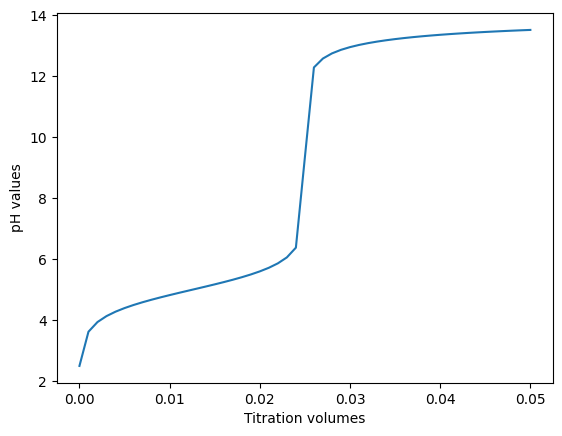

In [18]:
import matplotlib.pyplot as plt
# plt.plot(titration_volumes, pH_values)
plt.plot(titration_volumes, pH_values)
plt.xlabel('Titration volumes')
plt.ylabel('pH values')
plt.show()